# Rating Prediction Project

In [1]:
# importing useful librarier for the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
# packages from gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

#packages from nltk
import string
import nltk
from nltk.corpus import  stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# storing amazon rating and reviews
df1=pd.read_csv("amazon_review_rating.csv")
df1

,Review,Rating
0,i went with a refurbished item on this amd im ...,5.0 out of 5 stars
1,Nodes on wifi network randomly lose internet b...,2.0 out of 5 stars
2,This model has the power of the DIR-879 with s...,5.0 out of 5 stars
3,Works great when it’s working. First to use th...,3.0 out of 5 stars
4,I replaced my router from Spectrum which had a...,5.0 out of 5 stars
...,...,...
26303,Just got this...so time will tell.. This is a ...,5.0 out of 5 stars
26304,Worked and was so light for a while it slowed ...,3.0 out of 5 stars
26305,I’ve only had the laptop for a month but I’m v...,5.0 out of 5 stars
26306,Small and compact. Just what I was looking for...,5.0 out of 5 stars


In [3]:
# storing flipkart rating and reviews
df2=pd.read_csv("flipkart_review_rating.csv")
df2

,Review,Rating
0,An affordable beast ! Pros: 1. Incredible perf...,5
1,To be honest Pro's 1) RGB keyboard 2)144Hzs wi...,4
2,Best laptop in this price segment.. battery is...,5
3,"This laptop is a beast, and a steal for your m...",5
4,The Laptop is a masterpiece with stunnig desig...,4
...,...,...
27246,"Although I'm a geek, I always had issues with ...",4
27247,I really did bought this product just seeing t...,1
27248,Cisco linkys brands is know for its networking...,5
27249,"This is an excellent router, easy to install, ...",5


# Data Preprocessing

In [4]:
#checking data types forboth dataframe
df1.dtypes,df2.dtypes

(Review    object
 Rating    object
 dtype: object,
 Review    object
 Rating     int64
 dtype: object)

In [5]:
#checking null value if any
df1.isnull().sum(),df2.isnull().sum()

(Review    3
 Rating    0
 dtype: int64,
 Review    0
 Rating    0
 dtype: int64)

In [6]:
# dropping the rows containg null value
df1 = df1.dropna()

In [7]:
# chevking the rating colum values
df1['Rating'].value_counts(),df2['Rating'].value_counts()

(5.0 out of 5 stars    14687
 1.0 out of 5 stars     4721
 4.0 out of 5 stars     3521
 3.0 out of 5 stars     1907
 2.0 out of 5 stars     1450
 Null                     19
 Name: Rating, dtype: int64,
 5    16005
 4     4320
 2     2634
 3     2208
 1     2084
 Name: Rating, dtype: int64)

In [8]:
df1['Review'].value_counts(),df2['Review'].value_counts()

(Null                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [9]:
df1.loc[df1["Review"]=='Null']

,Review,Rating
3379,Null,Null
6675,Null,Null
6926,Null,Null
8120,Null,5.0 out of 5 stars
11765,Null,Null
13360,Null,5.0 out of 5 stars
14166,Null,Null
15219,Null,5.0 out of 5 stars
15397,Null,Null
15535,Null,Null


In [10]:
# dropping all rows which contains values as null
df1=df1.drop([25756,24076,23434,22695,22649,22433,19869,18650,18415,17815,16891,15981,15807,15669,15535,15397,15219,14166,13360,11765,8120,6926,6675,3379])

In [11]:
# checking again after cleaning
df1['Rating'].value_counts()

5.0 out of 5 stars    14682
1.0 out of 5 stars     4721
4.0 out of 5 stars     3521
3.0 out of 5 stars     1907
2.0 out of 5 stars     1450
Name: Rating, dtype: int64

In [12]:
# checking again after cleaning
df1['Review'].value_counts()

Love it                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [13]:
# dropping the string from rating column and change it into int datatype
df1['Rating']=df1['Rating'].str.replace('out of 5 stars', '')
df1["Rating"] = pd.to_numeric(df1["Rating"])
df1["Rating"]=df1["Rating"].astype(int)

In [14]:
#checking the dtype again
df1.dtypes

Review    object
Rating     int32
dtype: object

# New DataFrame for prediction

##### Now we will make a new dataframe from flipkart and amazon dataframe which contains equal valuecounts

In [15]:
df = pd.DataFrame()

amazon_rating5 = df1[df1['Rating'] == 5][:2042]
amazon_rating4 = df1[df1['Rating'] == 4][:2042]
amazon_rating3 = df1[df1['Rating'] == 3][:1907]
amazon_rating2 = df1[df1['Rating'] == 2][:1450]
amazon_rating1 = df1[df1['Rating'] == 1][:2042]
flipkart_rating5 = df2[df2['Rating'] == 5][:2042]
flipkart_rating4 = df2[df2['Rating'] == 4][:2042]
flipkart_rating3 = df2[df2['Rating'] == 3][:2177]
flipkart_rating2 = df2[df2['Rating'] == 2][:2634]
flipkart_rating1 = df2[df2['Rating'] == 1][:2042]

df = df.append(flipkart_rating5,ignore_index=True)
df = df.append(amazon_rating5,ignore_index=True)
df = df.append(flipkart_rating4,ignore_index=True)
df = df.append(amazon_rating4,ignore_index=True)
df = df.append(flipkart_rating3,ignore_index=True)
df = df.append(amazon_rating3,ignore_index=True)
df = df.append(flipkart_rating2,ignore_index=True)
df = df.append(amazon_rating2,ignore_index=True)
df = df.append(amazon_rating1,ignore_index=True)
df = df.append(flipkart_rating1,ignore_index=True)

df

,Review,Rating
0,An affordable beast ! Pros: 1. Incredible perf...,5
1,Best laptop in this price segment.. battery is...,5
2,"This laptop is a beast, and a steal for your m...",5
3,Good laptop but customer care folks are real d...,5
4,So i wanted a decent Gaming Laptop with Good s...,5
...,...,...
20415,Firstly it is not 1200 mbps its 867 mbps. Seco...,1
20416,Doesn't working 3 decos on even 2 floors in 15...,1
20417,I have used lot of Routers over the last 6-7 y...,1
20418,DLink sucks and the 3 year warranty is a sham....,1


In [16]:
# checking the values
df['Rating'].value_counts()

5    4084
4    4084
3    4084
2    4084
1    4084
Name: Rating, dtype: int64

In [17]:
# checking datatype
df.dtypes

Review    object
Rating     int64
dtype: object

observation: now we have made a perfect dataframe df...will go for data cleaning processs of NLP

In [18]:
# New feature (length) contains length of the review feature..
df['Review_length'] = df.Review.str.len()
df.head()

,Review,Rating,Review_length
0,An affordable beast ! Pros: 1. Incredible perf...,5,510
1,Best laptop in this price segment.. battery is...,5,440
2,"This laptop is a beast, and a steal for your m...",5,505
3,Good laptop but customer care folks are real d...,5,508
4,So i wanted a decent Gaming Laptop with Good s...,5,509


# Data Cleaning

In [19]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove leading and trailing whitespace
    #text=re.sub("[^\s+|\s+?$]"," ",text)
    # remove stop words
    stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text=stemmer.stem(text)
    # remove words with only two letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

In [20]:
# cleaning the reviews and storing them in a separate feature...
df["Clean_review"] = df["Review"].apply(lambda x: clean_text(x))

In [21]:
# checking the clean reviews..
df["Clean_review"]

0        affordable beast pro incredible performance av...
1        best laptop price segment battery quite bad pe...
2        laptop beast steal money combo rtx powerful ru...
3        good laptop customer care folk real disappoint...
4        want decent game laptop good spec find beast a...
                               ...                        
20415    firstly mbps mbps secondly mbps use support la...
20416                       work deco even floor foot area
20417    use lot router last year asus asus good old mt...
20418    dlink suck year warranty sham troubleshoot dli...
20419    get read review belkin router much good range ...
Name: Clean_review, Length: 20420, dtype: object

In [22]:
# New feature (Clean_length) contains length of the Clean_content feature after puncuations, stopwords removal..
df['Clean_review_length'] = df.Clean_review.str.len()
df.head()

,Review,Rating,Review_length,Clean_review,Clean_review_length
0,An affordable beast ! Pros: 1. Incredible perf...,5,510,affordable beast pro incredible performance av...,337
1,Best laptop in this price segment.. battery is...,5,440,best laptop price segment battery quite bad pe...,276
2,"This laptop is a beast, and a steal for your m...",5,505,laptop beast steal money combo rtx powerful ru...,265
3,Good laptop but customer care folks are real d...,5,508,good laptop customer care folk real disappoint...,312
4,So i wanted a decent Gaming Laptop with Good s...,5,509,want decent game laptop good spec find beast a...,302


# Building Word Dictionary

In [23]:
# Tokenizing Documents..
data=[]
from nltk.tokenize import word_tokenize
for j,i in enumerate(df['Clean_review']):
    a=word_tokenize(i,'english')
    data.append(a)

In [24]:
# Making Word dictionary...
dictionary = corpora.Dictionary(data)
print(dictionary)

Dictionary(11909 unique tokens: ['affordable', 'average', 'backlight', 'beast', 'black']...)


# EDA

In [25]:
# Making a wordcloud function in order to show the ratings from the dataset..
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Display_wordcloud(data,title):
    feedbackcloud = WordCloud(
        background_color = 'white',
        max_words = 1000,
        max_font_size = 40, 
        scale = 3,
        random_state = 25
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 10),facecolor='r')
    plt.axis('off')
    plt.imshow(feedbackcloud)
    plt.title(f"{title} Rating")
    plt.show()

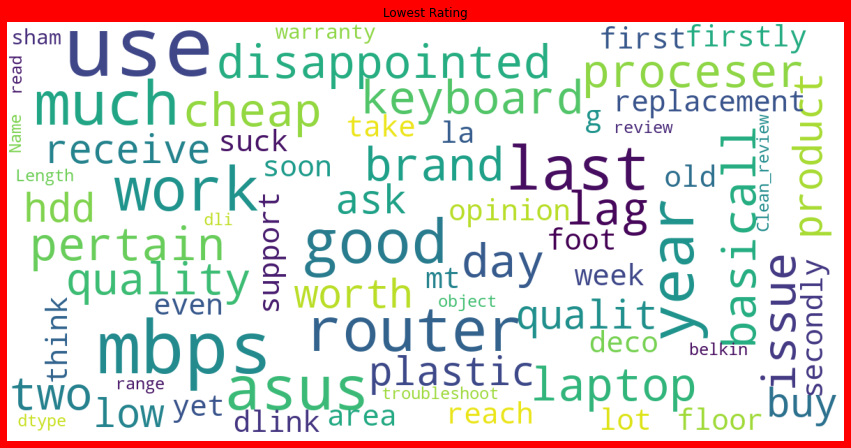

In [26]:
# word cloud for lowest rating
Display_wordcloud(df['Clean_review'][df['Rating']==1],"Lowest")

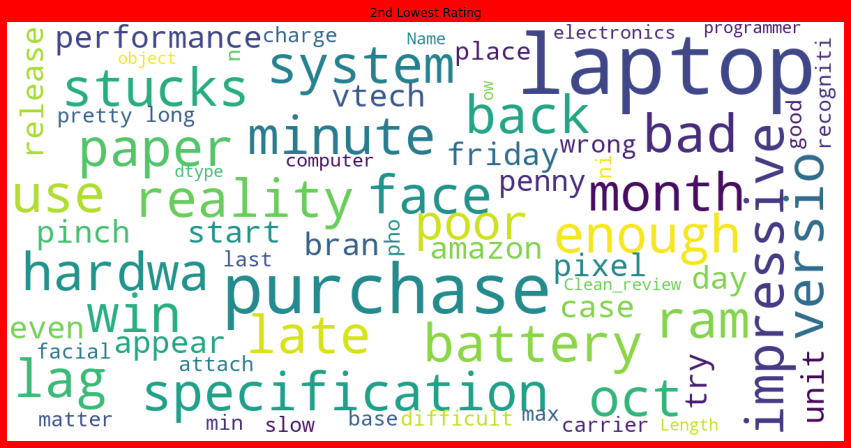

In [27]:
# word cloud for 2nd lowest rating
Display_wordcloud(df['Clean_review'][df['Rating']==2],"2nd Lowest")

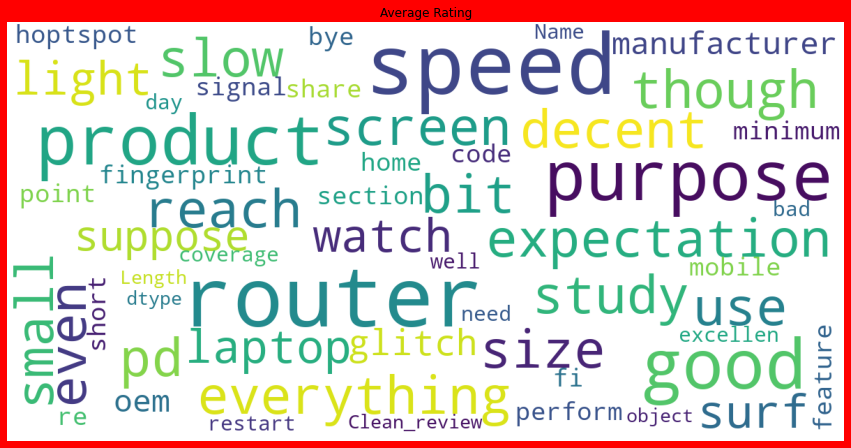

In [28]:
# word cloud for average rating
Display_wordcloud(df['Clean_review'][df['Rating']==3],"Average")

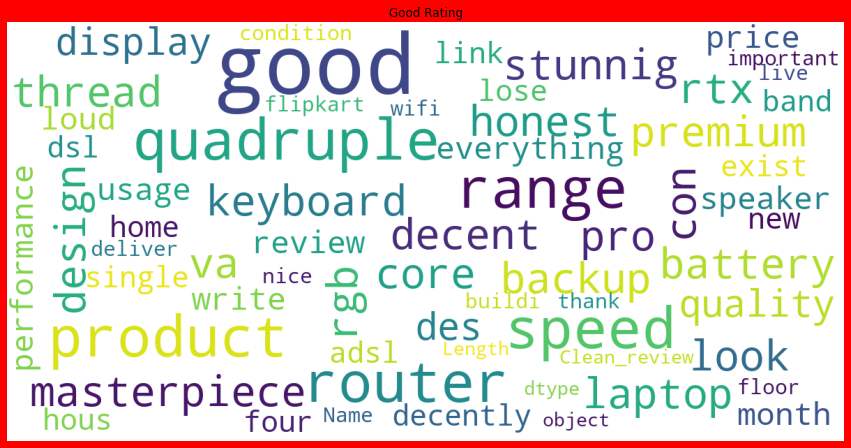

In [29]:
# word cloud for good rating
Display_wordcloud(df['Clean_review'][df['Rating']==4],"Good")

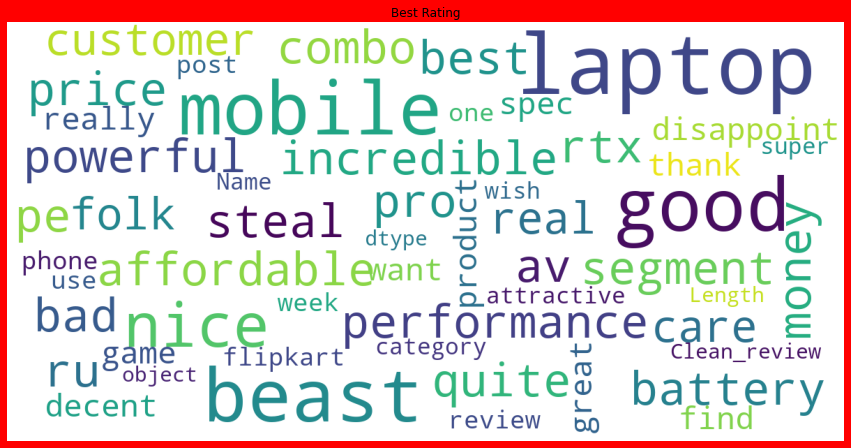

In [30]:
# word cloud for best rating
Display_wordcloud(df['Clean_review'][df['Rating']==5],"Best")

# Feature Extraction

In [31]:
# creating the TF-IDF(term frequency–inverse document frequency) vectorizer function in order to convert the tokens 
#   from the train documents into vectors so that machine can do further processing
def Tf_idf_train(text):
    tfid = TfidfVectorizer(min_df=3,smooth_idf=False)
    return tfid.fit_transform(text)

In [32]:
# Inserting vectorized values in a variable x, which will be used in training the model 
x=Tf_idf_train(df['Clean_review'])

# checking the shape of the data which is inserted in x which will be used for model training.
print("Shape of x: ",x.shape)

Shape of x:  (20420, 5066)


In [33]:
# Assigning the label in y and checking it's shape
y = df['Rating'].values
print("Shape of y: ",y.shape)

Shape of y:  (20420,)


# Model Training

In [34]:
# Importing useful libraries for model training

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques...

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances for different Classifiers

MNB=MultinomialNB()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
BGC=BaggingClassifier()
ETC=ExtraTreesClassifier()
XGB=XGBClassifier()

In [35]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('BaggingClassifier',BGC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('XGBClassifier',XGB))

In [36]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [37]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]

#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    

#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    
   

*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  59 is: 0.5848841005550114


Learning Score :  0.63187351336225
Accuracy Score :  0.5848841005550114
Cross Val Score :  0.4634671890303624
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.72      0.66      1225
           2       0.69      0.51      0.59      1226
           3       0.46      0.43      0.44      1225
           4       0.56      0.47      0.51      1225
           5       0.61      0.79      0.69      1225

    accuracy                           0.58      6126
   macro avg       0.59      0.58      0.58      6126
weighted avg       0.59      0.58      0.58      6126



Confusion Matrix:
 [[882 122 123  59  39]
 [325 627 153  81  40]
 [193  99 531 197 205]
 [ 28  50 245 580 322]
 [ 17  10 115 120 963]]


*************************** DecisionTreeClassifier ***************

[18:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[18:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[18:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Val Score :  0.48540646425073464
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.74      0.70      1225
           2       0.62      0.57      0.59      1225
           3       0.51      0.51      0.51      1225
           4       0.68      0.57      0.62      1226
           5       0.70      0.78      0.74 

In [38]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs
                     }) 
result

,Model,Learning Score,Accuracy Score,Cross Val Score
0,MultinomialNB(),63.187351,58.488410,46.346719
1,DecisionTreeClassifier,89.576046,59.565785,43.432909
2,RandomForestClassifier,89.555058,64.952661,49.098923
3,BaggingClassifier,88.414719,61.475677,46.718903
4,ExtraTreesClassifier,89.436127,66.046360,49.299706
5,XGBClassifier,76.843431,63.352922,48.540646


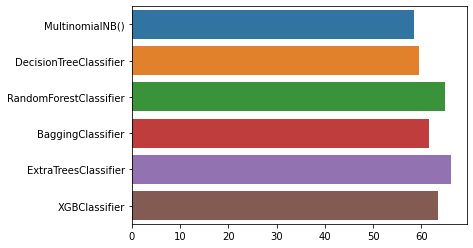

In [39]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

# Hyperparameter tuning using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Performing Hyperparameter tuning on RandomForestClassifier

rfc=RandomForestClassifier()
parameters={'n_estimators':[100,300,500],'max_depth':[15, 25, 30],'min_samples_leaf': [1,3,5], 'min_samples_split': [1,5,8]}
clf=GridSearchCV(rfc,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [42]:
#Applying the parameters we got after hyper parameter tuning
rfc=RandomForestClassifier(n_estimators=500,max_depth=30,min_samples_leaf=1, min_samples_split=5)
rfc.fit(x_train,y_train)
predrf=rfc.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6243878550440745
[[913  79 167  29  37]
 [306 598 248  39  34]
 [179  57 753  82 154]
 [ 32  32 318 600 244]
 [ 19   5 192  48 961]]
              precision    recall  f1-score   support

           1       0.63      0.75      0.68      1225
           2       0.78      0.49      0.60      1225
           3       0.45      0.61      0.52      1225
           4       0.75      0.49      0.59      1226
           5       0.67      0.78      0.72      1225

    accuracy                           0.62      6126
   macro avg       0.66      0.62      0.62      6126
weighted avg       0.66      0.62      0.62      6126



In [43]:
#Performing Hyperparameter tuning on ExtraTreesClassifier

etc=ExtraTreesClassifier()
parameters={'n_estimators':[100,300,500,800,1200],'max_depth':[3, 5, 8, 15, 25, 30]}
clf=GridSearchCV(etc,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 30, 'n_estimators': 1200}

In [44]:
#Applying the parameters we got after hyper parameter tuning
etc=RandomForestClassifier(n_estimators=1200,max_depth=30)
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.6312438785504407
[[936  71 166  25  27]
 [310 604 241  39  31]
 [178  57 754  87 149]
 [ 33  38 314 615 226]
 [ 20   7 196  44 958]]
              precision    recall  f1-score   support

           1       0.63      0.76      0.69      1225
           2       0.78      0.49      0.60      1225
           3       0.45      0.62      0.52      1225
           4       0.76      0.50      0.60      1226
           5       0.69      0.78      0.73      1225

    accuracy                           0.63      6126
   macro avg       0.66      0.63      0.63      6126
weighted avg       0.66      0.63      0.63      6126



# Final Model

### After applying results of hyperparameter tuning we have choosen ExtraTreesClassifier as our final model.

In [45]:
etc=RandomForestClassifier(n_estimators=1200,max_depth=30)
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.6302644466209598
[[921  72 176  25  31]
 [305 596 255  38  31]
 [176  53 772  79 145]
 [ 33  36 313 616 228]
 [ 21   6 198  44 956]]
              precision    recall  f1-score   support

           1       0.63      0.75      0.69      1225
           2       0.78      0.49      0.60      1225
           3       0.45      0.63      0.53      1225
           4       0.77      0.50      0.61      1226
           5       0.69      0.78      0.73      1225

    accuracy                           0.63      6126
   macro avg       0.66      0.63      0.63      6126
weighted avg       0.66      0.63      0.63      6126



In [47]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(etc,x,y,cv=10)
print(scores)
print(scores.mean(),scores.std())

[0.33790402 0.47110676 0.47110676 0.53085211 0.68658178 0.59353575
 0.47306562 0.52693438 0.61851126 0.58325171]
0.5292850146914789 0.09290256478794608


# Saving and Testing the Model

In [49]:
#saving our model

import joblib
joblib.dump(etc,'Ratings_prediction.pkl')

['Ratings_prediction.pkl']

In [50]:
model=joblib.load('Ratings_prediction.pkl')

In [51]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[1 3 3 4 1 3 5 1 2 5 3 3 5 3 3 4 1 2 3 4 4 1 2 1 3 4 2 5 1 4 3 1 2 5 4 2 3
 1 1 5 1 3 5 1 3 1 1 5 5 3 3 1 3 4 1 4 3 5 1 3 4 2 5 4 4 1 5 5 1 1 5 3 5 3
 1 3 4 3 1 3 5 2 4 3 3 5 3 1 3 4 2 3 5 1 1 3 3 3 2 3 1 1 5 1 2 5 2 2 4 4 2
 3 5 1 3 5 4 3 3 2 3 5 5 3 5 5 5 1 4 1 1 3 4 3 3 5 5 5 1 5 3 1 1 2 4 1 5 5
 2 1 3 4 5 2 1 1 5 5 1 5 5 1 5 3 3 5 4 2 3 4 5 1 2 3 5 5 2 1 1 1 3 3 1 4 2
 1 2 4 2 1 3 3 2 2 1 3 4 5 2 3 3 1 5 4 5 1 4 2 3 2 5 1 1 3 3 2 1 3 1 1 5 1
 4 1 1 5 1 1 5 5 1 4 2 2 5 1 5 3 1 4 3 1 2 1 5 5 3 3 3 3 1 1 3 1 1 5 3 1 5
 1 4 5 1 1 3 3 3 2 1 4 1 3 4 5 1 2 4 1 5 3 1 1 5 3 3 4 2 5 2 2 3 1 4 5 5 3
 4 1 3 5 5 2 3 3 3 5 5 5 3 3 2 5 1 4 3 1 5 5 1 1 4 5 2 3 3 3 5 2 3 3 4 4 5
 1 1 3 5 1 3 1 2 3 3 1 4 2 1 3 1 3 4 5 5 1 2 1 3 1 3 4 5 3 1 3 5 3 2 3 1 5
 5 5 3 5 1 3 1 3 3 5 5 3 3 1 1 5 5 5 5 3 1 4 5 3 5 5 5 1 3 2 5 1 1 1 2 4 3
 3 2 3 1 3 2 1 3 4 2 3 3 4 3 4 2 3 3 5 4 1 2 5 4 4 2 1 1 2 4 4 4 1 3 3 5 3
 5 3 4 5 2 3 1 1 2 1 3 4 5 4 5 2 4 1 2 4 5 3 5 2 5 3 1 5 2 3 5 1 5 5 1 5 4
 5 1 5 5 1 1 4 5 1 1 5 2 